CAU 3

DATA PRE-PROCESSING

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('D:/LAP TRINH/DS102.P21.2/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
df.shape

(517, 13)

In [16]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [17]:
for col_name in df.columns:
    print('Total NaN: ', df[col_name].isna().sum(), 'in column', col_name)
    print('Total null: ', df[col_name].isnull().sum(), 'in column', col_name)
    print('Data type:', df[col_name].dtype, 'in column', col_name)
    print("_"*10)

Total NaN:  0 in column X
Total null:  0 in column X
Data type: int64 in column X
__________
Total NaN:  0 in column Y
Total null:  0 in column Y
Data type: int64 in column Y
__________
Total NaN:  0 in column month
Total null:  0 in column month
Data type: object in column month
__________
Total NaN:  0 in column day
Total null:  0 in column day
Data type: object in column day
__________
Total NaN:  0 in column FFMC
Total null:  0 in column FFMC
Data type: float64 in column FFMC
__________
Total NaN:  0 in column DMC
Total null:  0 in column DMC
Data type: float64 in column DMC
__________
Total NaN:  0 in column DC
Total null:  0 in column DC
Data type: float64 in column DC
__________
Total NaN:  0 in column ISI
Total null:  0 in column ISI
Data type: float64 in column ISI
__________
Total NaN:  0 in column temp
Total null:  0 in column temp
Data type: float64 in column temp
__________
Total NaN:  0 in column RH
Total null:  0 in column RH
Data type: int64 in column RH
__________
Tota

In [18]:
def convert_day(day: str)->int:
    day_dict = {
        'mon': 2,
        'tue': 3,
        'wed': 4, 
        'thu': 5,
        'fri': 6,       
        'sat': 7,
        'sun': 8          
    }
    return day_dict[day]

In [19]:
def convert_month(month: str)->int:
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict[month]   

In [20]:
df['month'] = df['month'].apply(convert_month)

In [21]:
df['day'] = df['day'].apply(convert_day)

FEATURE ENGINEERING

In [27]:
data_cor = df.copy()

In [28]:
for col in df.columns:
    if data_cor[col].dtype == 'int64' or col == 'area':
        data_cor = data_cor.drop(columns=[f'{col}'])

In [29]:
data_cor

,FFMC,DMC,DC,ISI,temp,wind,rain
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,4.0,0.0


Correlation coefficient

In [31]:
corr_matrix = data_cor.corr()
corr_matrix

,FFMC,DMC,DC,ISI,temp,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.227116,0.069491
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.061119,1.000000


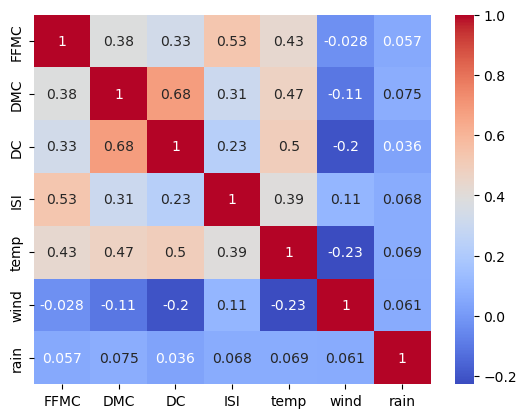

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

DCM và DC có cor là 0.68 (cao nhất trong cor_mat) nên chúng ta chọn bỏ 1 trong 2. Ở đây ta sẽ bỏ feature DC

In [35]:
X_Y = df.drop(columns =['DC']).to_numpy()

MODEL

In [40]:
class LinearRegression:
    def rmse(self, Y: np.ndarray , Y_pred: np.ndarray ) -> float:
        #calculate root-mean-square error
        delta = Y - Y_pred

        return (delta**2).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # optimize weights 
        inv_cov = np.linalg.inv(X.T @ X)
        self.thelta = inv_cov @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # predict the area (output)
        y = self.thelta.T @ X.T

        return y

In [44]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [46]:
X_train = X_Y_train[:,:11]
Y_train = X_Y_train[:,11:]

X_test = X_Y_test[:, :11]
Y_test = X_Y_test[:, 11:]

In [ ]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, Y_train)

In [48]:
Y_predicted = lr.predict(X_test)

In [49]:
Y_predicted

array([[ 3.24734040e+01,  2.59154909e+01,  2.64333651e+01,
         1.50458945e+01,  3.88598733e+00,  2.49369999e+01,
         2.48584791e+01,  2.48226999e+01,  1.66698652e+01,
         4.21453262e+01,  1.11828062e+01,  3.41912006e+01,
         1.89869224e+01,  2.53881312e+01,  1.58767666e+01,
         1.71734645e+01,  2.35050858e+01,  3.16658199e+01,
         1.84520133e+01,  2.34840934e+01,  1.81042786e+01,
         2.63067276e+01,  1.05770459e+01,  2.11701668e+01,
         2.09964716e+01,  2.12772522e+01,  9.76890023e+00,
         2.69617674e+01,  2.29587733e+01, -5.36238188e+00,
        -9.58499363e+00,  2.38792610e+01,  5.75311127e-01,
         1.91824163e+01, -2.22171741e+00,  1.64559563e+01,
         2.24573045e+01,  9.56004888e+00, -2.81191654e+00,
         1.45236473e+01,  2.39274059e+01,  2.00388750e+01,
        -1.07403389e+00,  1.79568299e+01,  1.24294698e+01,
         2.41652173e+01,  2.56850079e+01,  1.78821065e+01,
         2.41652173e+01,  2.16287786e+01, -1.00752063e+0

In [50]:
lr.rmse(Y_test, Y_predicted)

np.float64(81.12662476899709)

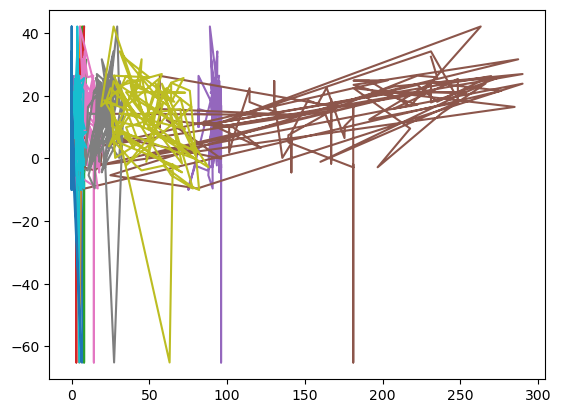

In [51]:
plt.plot(X_test, Y_predicted.T)